# **Table of Contents**
1. [Introduction](#1)
2. [Case study](#2)
3. [Explore Data with the plot method](#3)
4. [Split the data into training and testing](#4)
5. [Implementation with StatsForecast](#5)
6. [Evaluate the model](#6)
7. [Conclusion](#7)
8. [References](8)

<a id="1"></a> 
# **Introduction**

Time series modeling is a widely used technique in the field of prediction and forecasting, especially in the business field. One of the common applications of time series modeling is forecasting or sales forecasting, where the aim is to accurately predict the future demand for a product.

In this context, this article will address time series modeling applied to egg sales forecasting, a fundamental food product in high demand in many markets. The goal is to use historical egg sales data to develop predictive models to estimate future sales as accurately as possible.

Time series modeling focuses on the analysis and extraction of temporal patterns inherent in data, allowing the capture of trends, seasonalities, and other components relevant to prediction. By properly understanding and modeling these patterns, it is possible to generate more accurate and useful forecasts for business decision making, such as inventory planning, supply chain management, and resource optimization.

In this context, different time series modeling approaches will be explored, such as the AutoARIMA model, which uses automatic parameter tuning techniques to capture data trends and seasonalities. The Hws_mul model, which employs a multiplicative approach to handle seasonalities in egg sales data, will also be considered.

In addition, common evaluation measures used in time series forecasting, such as MASE (Mean Absolute Scaling Error), MAE (Mean Absolute Error), MAPE (Mean Absolute Percentage Error), RMSE (Mean Absolute Percentage Error), will be discussed. Mean Square) and the SMAPE (Symmetric Mean Absolute Percentage Error). These measures allow the performance of the models to be evaluated and compared in terms of their ability to accurately predict egg sales.

In summary, time series modeling offers a robust and reliable approach to egg sales forecasting. Through the analysis of temporal patterns and the use of appropriate models, it is possible to generate accurate forecasts that help companies make informed decisions and optimize their performance in the market.

<a id="2"></a>
# **Case study**

In this case study, we will explore the time series modeling process applied to egg sales forecasting. We will use historical sales data and apply different techniques and models to predict future demand for eggs. The goal is to develop an accurate and reliable model that allows a company to plan its production, manage its inventory and make informed decisions based on sales predictions.

1. Data collection and exploration.
2. Data preprocessing.
3. Model selection.
4. Model adjustment.
5. Generation of forecasts.
6. Validation and evaluation of the model.

Time series modeling applied to egg sales forecasting is a valuable tool for companies that want to plan their production and manage their inventory efficiently. By using appropriate techniques and models, it is possible to generate accurate forecasts that help make informed decisions and optimize business performance. However, it is important to note that forecast accuracy can be affected by external factors such as changes in market demand or unexpected events, so constant monitoring and updating the model as necessary is recommended.


## Importing Libraries

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': 'gray',  # #212946
    'axes.facecolor': 'gray',
    'savefig.facecolor': 'gray',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#000000',  #2A3459
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================

plt.rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

## **About Dataset**

This dataset provides a detailed look into the sales of eggs in a shop in Sri Lanka over a span of 30 years, capturing seasonal variations, cultural events, and even global incidents. 

- Date: Represents the date for which the sales data is recorded. It spans from the year 1993 to 2022.
- Egg Sales: he number of eggs sold on the corresponding date. This is the target variable you'll be predicting for the test dataset.

You can find this data set on [kaggle](https://www.kaggle.com/competitions/egg-sales-predict-challenge-23sl/data)


In [4]:
df=pd.read_csv("../tutorial/train_egg_sales.csv",sep=";", parse_dates=["Date"])
df

,Date,Egg Sales
0,1993-01-01,91
1,1993-01-02,124
2,1993-01-03,112
3,1993-01-04,115
4,1993-01-05,107
...,...,...
10587,2021-12-27,681
10588,2021-12-28,664
10589,2021-12-29,613
10590,2021-12-30,643


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In this case we are going to use pm2_5 as the target variable.

In [5]:
df["unique_id"]="1"
df=df.rename(columns={"Date": "ds", "Egg Sales": "y"})
df.head()

,ds,y,unique_id
0,1993-01-01,91,1
1,1993-01-02,124,1
2,1993-01-03,112,1
3,1993-01-04,115,1
4,1993-01-05,107,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10592 entries, 0 to 10591
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         10592 non-null  datetime64[ns]
 1   y          10592 non-null  int64         
 2   unique_id  10592 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 248.4+ KB


<a id="3"></a>
# **Explore Data with the plot method**

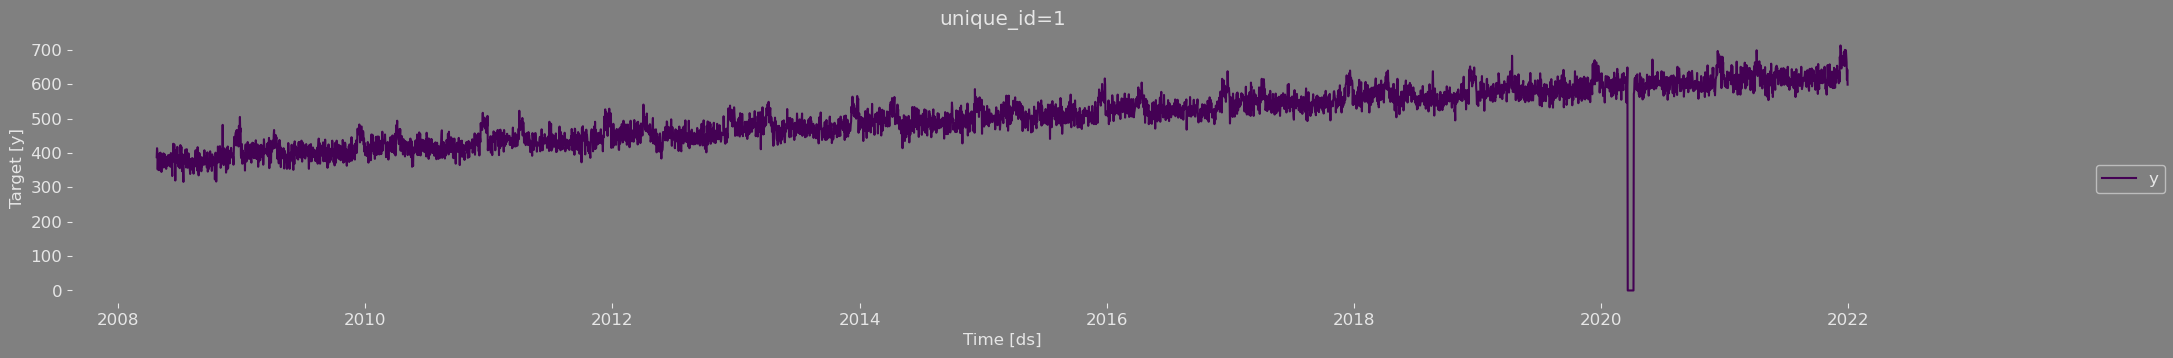

In [7]:
plot_series(df,max_insample_length=5000)

In [8]:
df = df[df['y']!=0]
df['Year'] = df['ds'].dt.year
df['Month'] = df['ds'].dt.month
df['Day'] = df['ds'].dt.day
idx = df[(df.Month==12)&(df.Day>24)].index
df = df.drop(idx)
df = df.drop(columns=['Year','Month','Day'])
df = df.reset_index(drop=True)

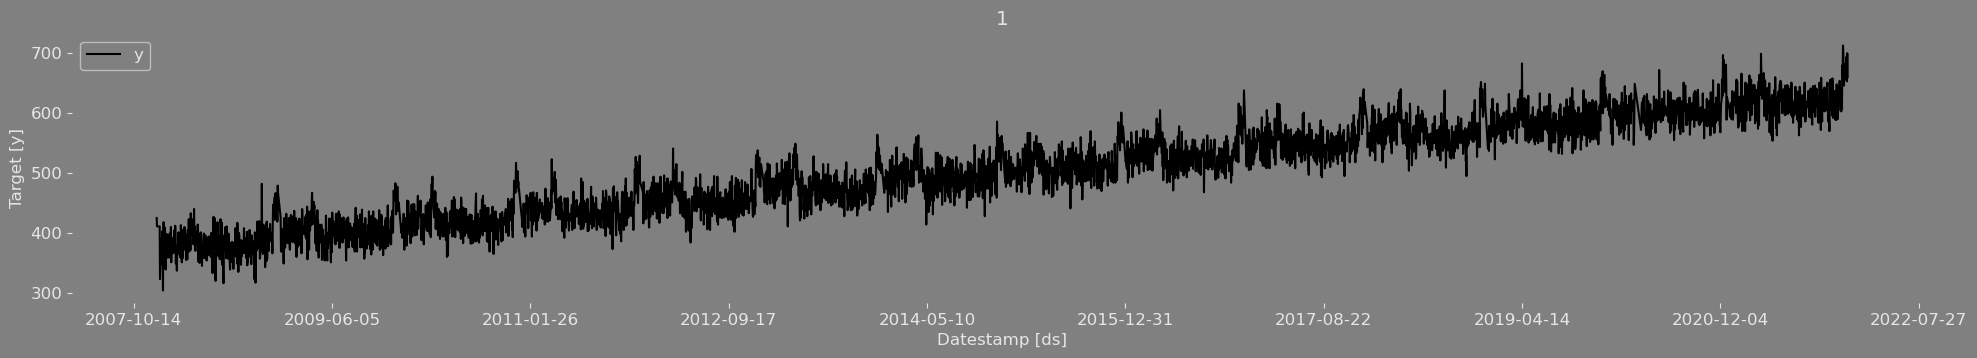

In [9]:
StatsForecast.plot(df, max_insample_length=5000)

Egg sales increases over years at a linear pace.

<Axes: xlabel='year'>

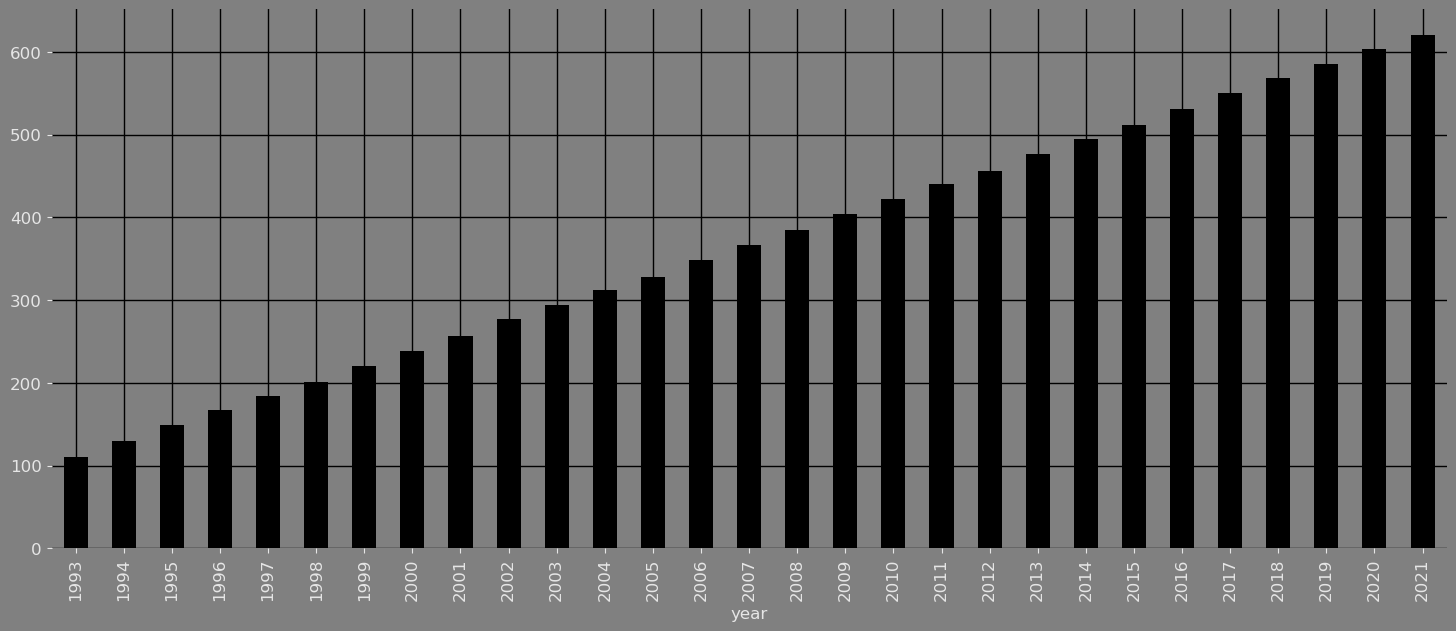

In [10]:
# extract year / month / day 
df['year'] = df["ds"].dt.year

# plot the Coffee (arabica) usage
df.groupby('year').y.mean().plot.bar()

**Some Observations:**

* The sales steadily increased from 1993 and was at its highest in 2021
* The sales dropped in 2020 probably due to Covid / lockdown

Let's look at sales in recent years 2019, 2020, 2021

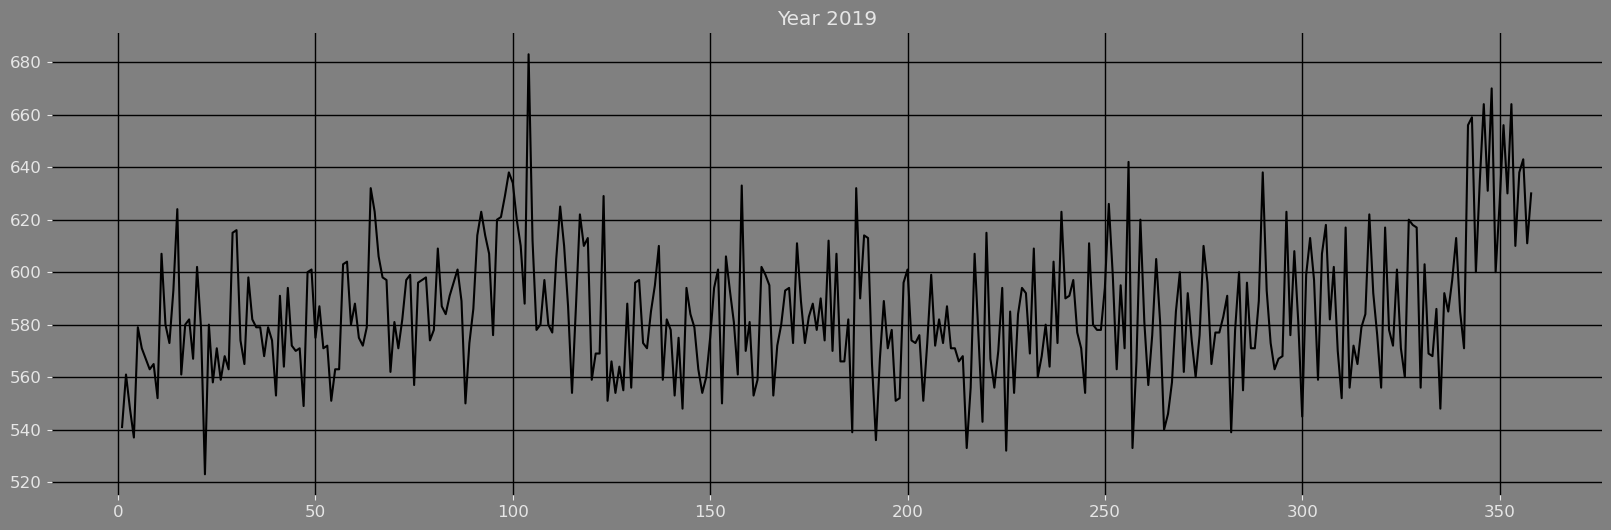

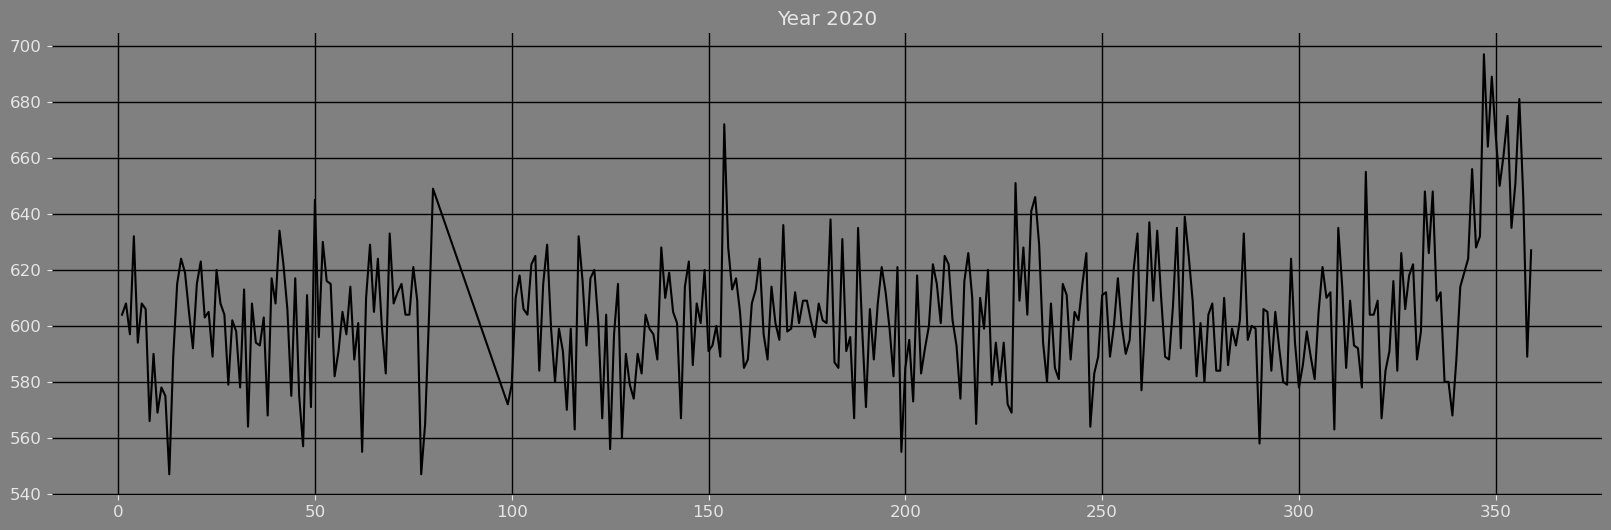

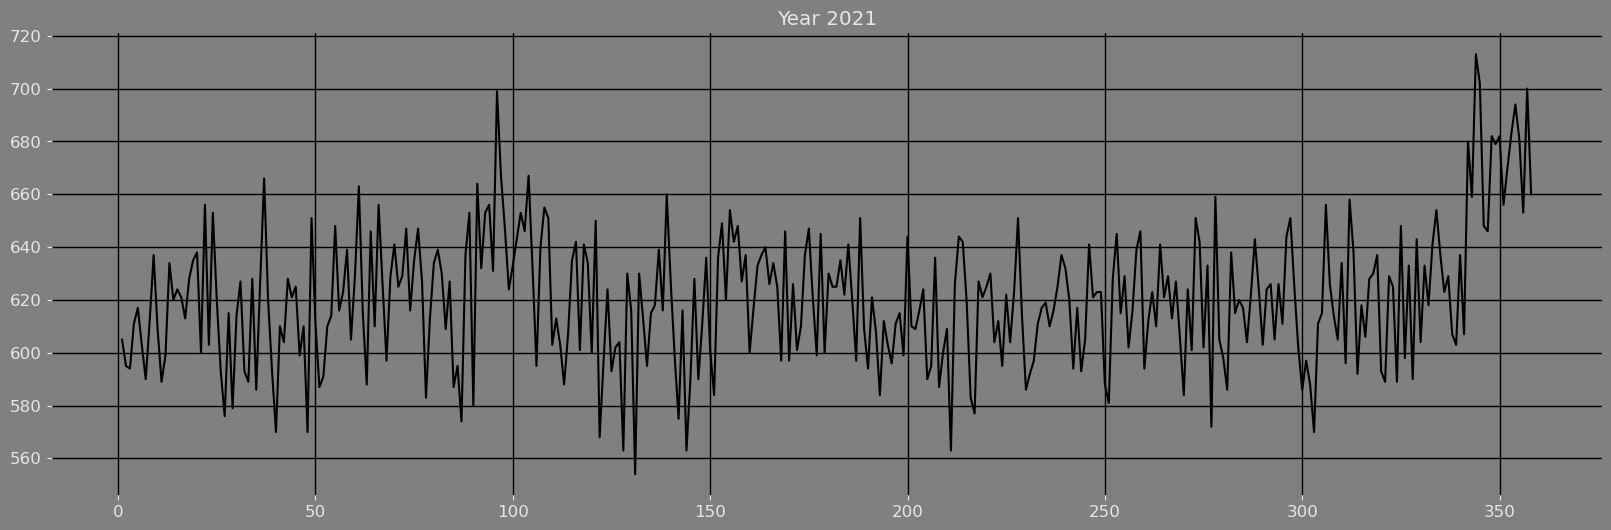

In [11]:
for i in range(2019,2022):
    a = df.copy()
    a['Year'] = a['ds'].dt.year
    a['DayOfYear'] = a['ds'].dt.dayofyear
    a['Month'] = a['ds'].dt.month
    a = a[a.Year==i]
    plt.figure(figsize=(20,6))
    plt.title(f'Year {i}')
    plt.plot(a['DayOfYear'],a['y'])

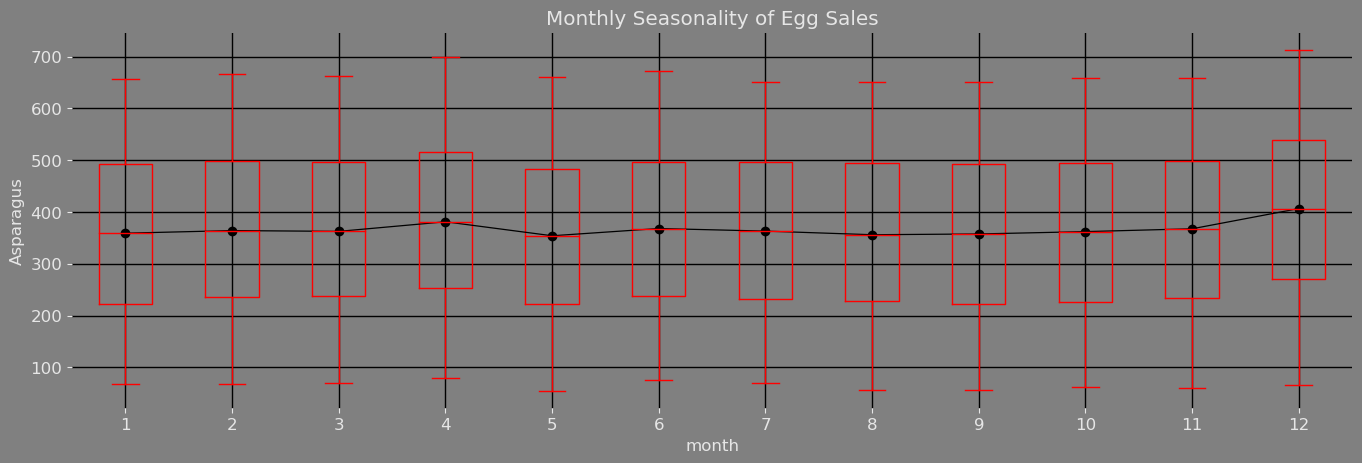

In [12]:
# Boxplot graph for monthly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(16, 5))
df['month'] = df['ds'].apply(lambda x: x.month)
df.boxplot(column="y", by='month', ax=ax, color="red")
df.groupby('month')["y"].median().plot(style='o-', linewidth=0.9, ax=ax)
ax.set_ylabel('Asparagus')
ax.set_title('Monthly Seasonality of Egg Sales')
fig.suptitle('');
#plt.savefig("Gráfico de Barra-mes")

No obvious seasonal or cyclic pattern is observed

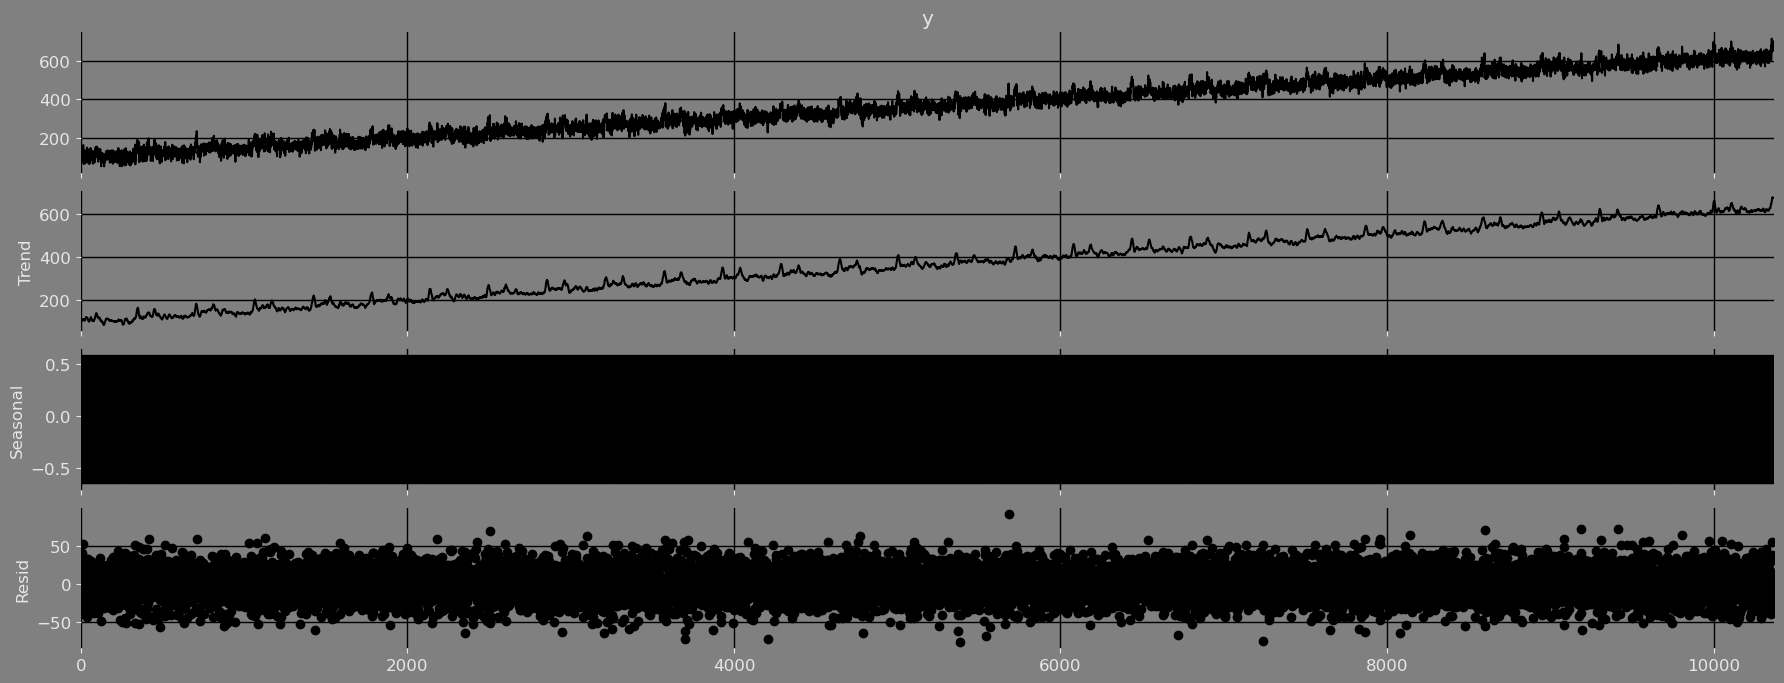

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose 
a = seasonal_decompose(df["y"], model = "additive", period=12)
a.plot();

<a id="4"></a>
# **Split the data into training and testing**

Let's divide our data into two parts:

1. Data to train the model.
2. Data to test the model, here we will use the last 60 daily.

In [14]:
df=df[["ds","y","unique_id"]]

In [15]:
train = df[df.ds<='2021-10-25'] 
test=df[(df['ds'] > '2021-10-25')]

train.shape, test.shape

((10311, 3), (60, 3))

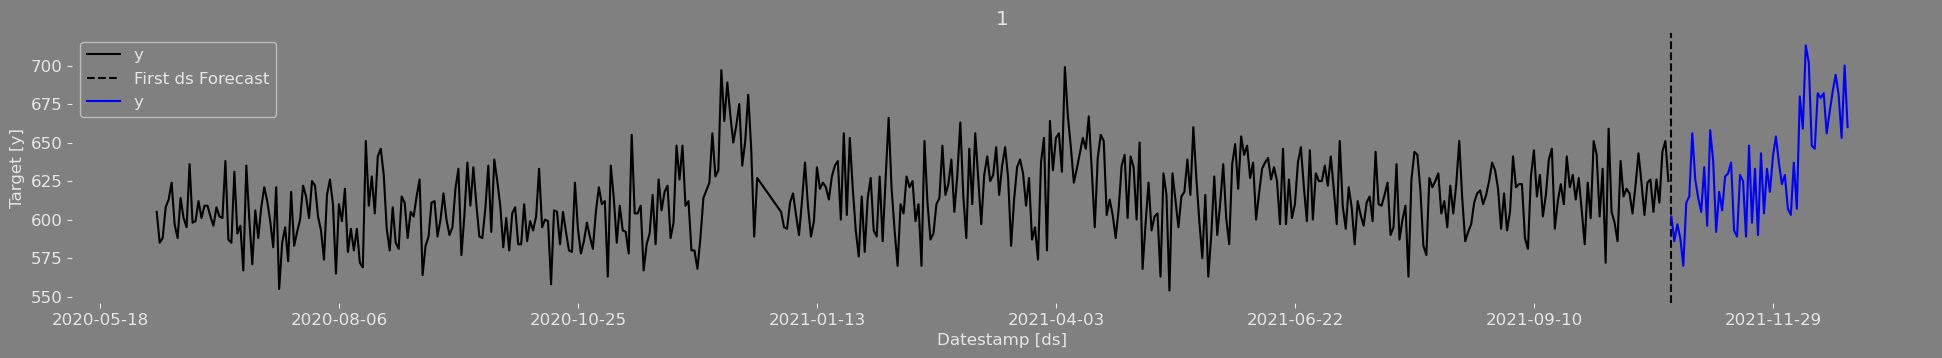

In [16]:
StatsForecast.plot(train, test,max_insample_length=500)

<a id="5"></a>
# **Implementation with StatsForecast**

We are going to train the `Arima`,`Holt Winter` model, using the `AutoArima`, `HoltWinters` function. This model will help us forecast egg sales in the next 60 day.

In [17]:
from statsforecast import StatsForecast
from statsforecast.models import  AutoARIMA, HoltWinters ,SeasonalNaive

In [18]:
season_length = 7 # Daily data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
          HoltWinters(season_length=season_length, error_type='M', alias='Hws_mul'),
          SeasonalNaive(season_length=season_length)]

In [19]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    df=train,
    models=models,
    freq='D', 
    n_jobs=-1)

## **Fit the Model**

In [20]:
sf.fit()

StatsForecast(models=[AutoARIMA,Hws_mul,SeasonalNaive])

## **Predict Method**
We will use the predict method to forecast the last 60 day egg sales. This method only has one parameter, the forecast horizon.

In [21]:
Y_hat = sf.predict(horizon)
Y_hat.head(15)

,ds,AutoARIMA,Hws_mul,SeasonalNaive
unique_id,,,,
1,2021-10-26,627.11438,625.835510,626.0
1,2021-10-27,627.11438,626.302002,605.0
1,2021-10-28,627.11438,627.689148,626.0
1,2021-10-29,627.11438,628.099976,611.0
1,2021-10-30,627.11438,627.956848,644.0
1,2021-10-31,627.11438,626.291565,651.0
1,2021-11-01,627.11438,627.379333,625.0
1,2021-11-02,627.11438,626.191895,626.0
1,2021-11-03,627.11438,626.658691,605.0


## **Forecasting Plot**

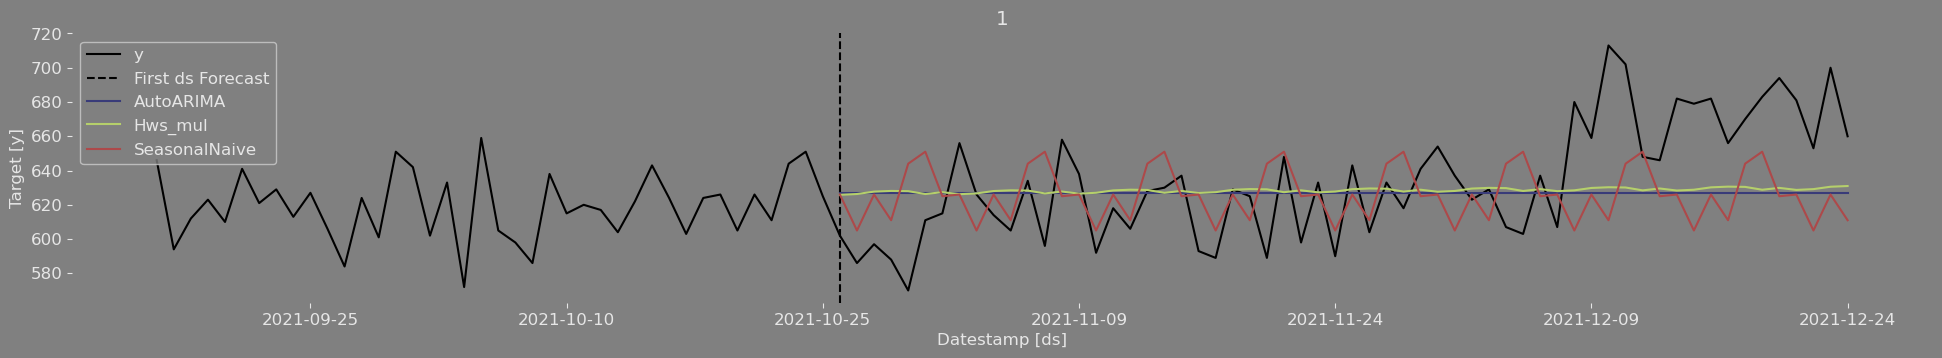

In [22]:
sf.plot(df, Y_hat, max_insample_length=100)

<a id="6"></a>
# **Evaluate the model**

In [23]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [24]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [25]:
print(evaluate_performace(train, test,Y_hat.reset_index() , models=["AutoARIMA","Hws_mul", "SeasonalNaive"]))

                   mase        mae      mape       rmse     smape
AutoARIMA      1.027021  27.734749  4.317591  34.308681  4.364382
Hws_mul        1.004690  27.131709  4.231851  33.466701  4.268577
SeasonalNaive  1.112755  30.050000  4.671599  37.537315  4.729041


<a id="7"></a>
# **Exogenous variables**
We are going to select the exogenous variables that will enter our model, for this it is necessary to have two sets of data:

1. The training data: this data will contain all the exogenous variables that we are going to add to our model plus the target variables.
2. Data with exogenous variables: we select the variables that we want to add to our model, but this data set does not contain the target variable.

Let's load the data... and see!!!

## **Generating data with Mlforecast**

We are going to use the `MLforcast` function to generate residual variables, for this we are going to use two parameters:
1. The `lags` of 1,7 and 14
2. The `lag_transforms`:
     - expanding_mean: we use it to identify trends and to smooth out fluctuations in our time series.
     - rolling_mean: we use it to identify trends and to smooth out fluctuations in our time series.

In [26]:
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean
from mlforecast import MLForecast

from statsforecast.models import  AutoARIMA, SeasonalNaive

In [27]:
season_length = 7 # Daily data 

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length),
          SeasonalNaive(season_length=season_length)]

In [28]:
mlf = MLForecast(models=models,
                 freq='D', 
                 lags=[1,7,14],
                 lag_transforms={1: [expanding_mean], 12: [(rolling_mean, 7)] }       
                 )

Now let's visualize the data we have generated using `MLForecast`.

In [29]:
data=df[["ds","y","unique_id"]]
prep = mlf.preprocess(data)
prep

,ds,y,unique_id,lag1,lag7,lag14,expanding_mean_lag1,rolling_mean_lag12_window_size7
18,1993-01-19,68.0,1,128.0,109.0,107.0,110.611115,106.714287
19,1993-01-20,132.0,1,68.0,103.0,104.0,108.368423,109.285713
20,1993-01-21,101.0,1,132.0,80.0,94.0,109.550003,104.142860
21,1993-01-22,100.0,1,101.0,111.0,109.0,109.142860,101.000000
22,1993-01-23,116.0,1,100.0,165.0,88.0,108.727272,106.000000
...,...,...,...,...,...,...,...,...
10366,2021-12-20,694.0,1,683.0,646.0,637.0,366.063965,626.571411
10367,2021-12-21,681.0,1,694.0,682.0,607.0,366.095581,631.714294
10368,2021-12-22,653.0,1,681.0,679.0,680.0,366.125977,643.714294
10369,2021-12-23,700.0,1,653.0,682.0,659.0,366.153625,657.285706


In [30]:
prep.drop(columns=['unique_id', 'ds']).corr()['y']

y                                  1.000000
lag1                               0.982511
lag7                               0.980077
lag14                              0.977274
expanding_mean_lag1                0.986881
rolling_mean_lag12_window_size7    0.984620
Name: y, dtype: float64

# **Splitting training and test data with exogenous variables**
<a id="8"></a>
Let's divide our data into sets
1. Data to train our model
2. Data to test our model

For the test data we will use the last 60 daily to test and evaluate the performance of our model.

In [31]:
exogen=prep[['ds', 'unique_id', 'lag1', 'lag7','lag14', 'expanding_mean_lag1','rolling_mean_lag12_window_size7']]

In [32]:
train_exo = prep[prep.ds<='2021-10-25'] 
test_exo=exogen[(exogen['ds'] > '2021-10-25')]

train_exo.shape, test_exo.shape

((10293, 8), (60, 7))

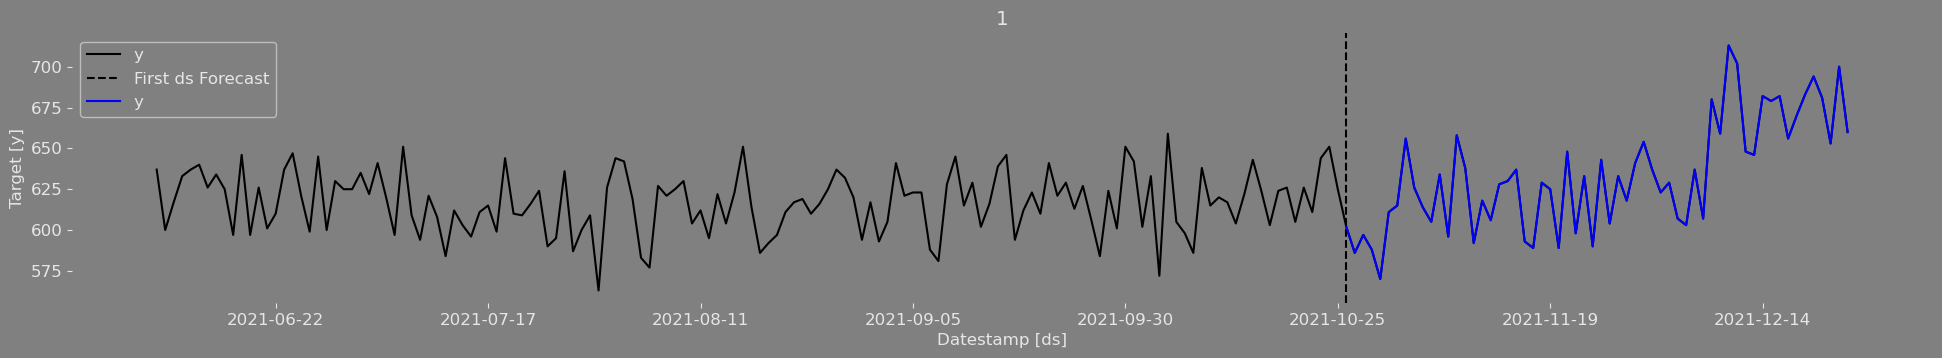

In [33]:
StatsForecast.plot(prep, test, max_insample_length=200)

<a id="9"></a>
# **Implementation of StatsForecast with exogenous variables**

We are going to train the `Arima`,`Holt Winter` model, using the `AutoArima`, `HoltWinters` function. This model will help us forecast egg sales in the next 60 day.

In [34]:
season_length = 7 # Daily data 
horizon = len(test_exo) # number of predictions

# We call the model that we are going to use
models_exo = [AutoARIMA(season_length=season_length),
          HoltWinters(season_length=season_length, error_type='M', alias='Hws_mul'),
          SeasonalNaive(season_length=season_length)]
          

In [35]:
# Instantiate StatsForecast class as sf
sf_exo = StatsForecast(
    models=models_exo,
    freq='D', 
    n_jobs=-1)

## **Fit the Model**

The fit method has two parameters:

* Training data with exogenous variables.
* Data with only exogenous variables.

In [36]:
sf_exo.fit(train_exo, test_exo)

StatsForecast(models=[AutoARIMA,Hws_mul,SeasonalNaive])

## **Predict Method**

The predict method takes only 2 parameters

* The Horizon: amount of data you want to predict.
* Exogenous variables without the target variable.

We will use the predict method to forecast the last 60 day egg sales. This method only has one parameter, the forecast horizon.

In [37]:
Y_hat_exo = sf_exo.predict(horizon, X_df=test_exo)
Y_hat_exo.head()

,ds,AutoARIMA,Hws_mul,SeasonalNaive
unique_id,,,,
1,2021-10-26,628.184570,625.726990,626.0
1,2021-10-27,599.576233,626.810791,605.0
1,2021-10-28,583.565674,628.070496,626.0
1,2021-10-29,594.542175,627.801880,611.0
1,2021-10-30,584.407959,627.611084,644.0


## **Forecasting Plot**

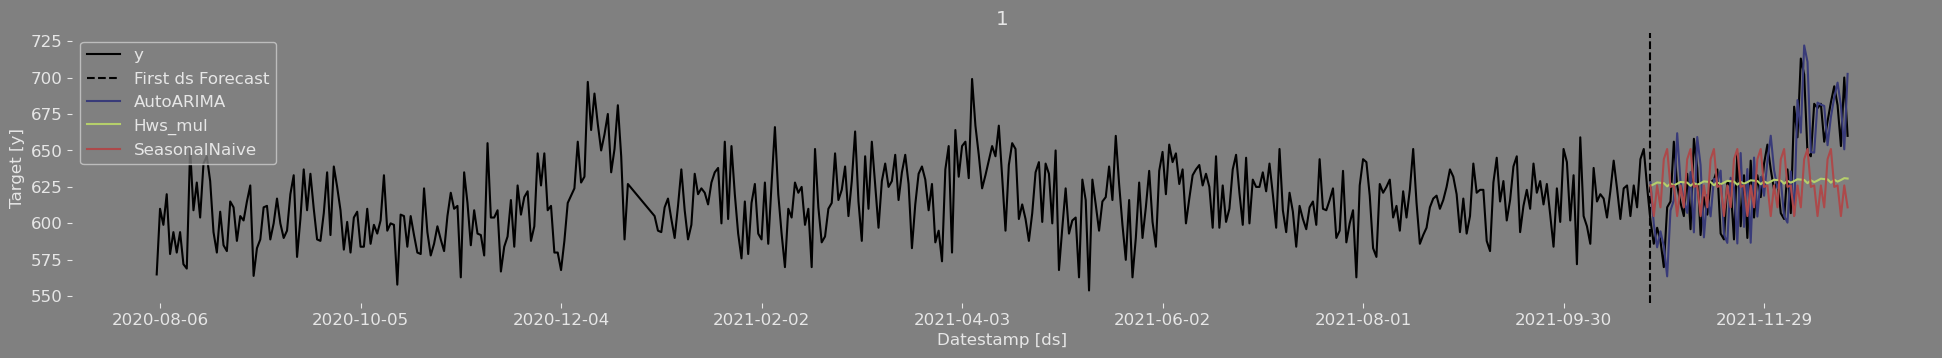

In [38]:
sf.plot(prep, Y_hat_exo, max_insample_length=500)

<a id="10"></a>
# **Evaluate the model for exogenous variables**

In [39]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [40]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [41]:
actual_exo=prep[prep.ds>'2021-10-25'] 

In [42]:
print("With exogenous variable")
print(evaluate_performace(train_exo, actual_exo,Y_hat_exo.reset_index() , models=["AutoARIMA","Hws_mul", "SeasonalNaive"]))
print("======"*10)
print("No exogenous variable")
print(evaluate_performace(train, test,Y_hat.reset_index() , models=["AutoARIMA","Hws_mul", "SeasonalNaive"]))

With exogenous variable
                   mase        mae      mape       rmse     smape
AutoARIMA      0.987347  26.664030  4.202230  32.328983  4.214739
Hws_mul        1.004182  27.118673  4.229508  33.453094  4.266514
SeasonalNaive  1.112726  30.049999  4.671599  37.537315  4.729042
No exogenous variable
                   mase        mae      mape       rmse     smape
AutoARIMA      1.027021  27.734749  4.317591  34.308681  4.364382
Hws_mul        1.004690  27.131709  4.231851  33.466701  4.268577
SeasonalNaive  1.112755  30.050000  4.671599  37.537315  4.729041


<a id="7"></a>
# **Conclusion**

The analysis presents the results of different models used to predict egg sales. Evaluation measures are provided for each model, such as MASE, MAE, MAPE, RMSE, and SMAPE.

In the results presented, it is observed that the AutoARIMA model has the lowest MASE value, indicating that its predictions are more accurate compared to a naive reference model that simply predicts the previous value. The AutoARIMA model also has the lowest value of MAE, which represents the average absolute error of the predictions, indicating that the predictions are closer to the actual values on average.

The Hws_mul model has results close to the AutoARIMA model, with slightly higher values in all evaluation measures. However, the difference is small and both models appear to be comparable in terms of prediction accuracy.

On the other hand, the SeasonalNaive model shows the worst results in all evaluation measures. This suggests that this model is not effective in predicting egg sales and underperforms compared to the other models tested.

Here the metric can be a little misleading, since if we see the performance of the predictions and the graphs of the models of their predictions, the 'Holt Winter multiplicative' model is a bad model, since it does not predict or learn from the behavior of the time series.

In summary, the AutoARIMA and Hws_mul models show similar performance and are considered better options for predicting egg sales compared to the SeasonalNaive model. However, it is important to note that these results are specific to the egg sales data and context, and could vary in different scenarios or with different data sets.

<a id="8"></a>
# **References**

1. [Arima model](https://nixtla.github.io/statsforecast/docs/models/autoarima.html)
2. [Holt Winter Model](https://nixtla.github.io/statsforecast/docs/models/holtwinters.html)
3. Kanchana1990. (2023). Egg Forecast Challenge Sri Lanka. Kaggle. https://kaggle.com/competitions/egg-sales-predict-challenge-23sl

4. [Panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)
5. [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/)
6. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”](https://otexts.com/fpp3/tscv.html)